In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
DATASET = '/home/swei20/sketch/hill-sketch/data/simple/kmat.xlsx'

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import copy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [6]:
from code.data.dataset import load_data
from code.data.bulk import prepro_data

In [7]:
data,keep_columns = load_data(DATASET)

Index(['k11', 'k12', 'k13', 'k14', 'k21', 'k22', 'k23', 'k24', 'k31', 'k32',
       'k33', 'k34', 'k41', 'k42', 'k43', 'k44', 'k55', 'k56', 'k65', 'k66'],
      dtype='object')


In [18]:
dimPCA = 6

=============== PCA N_component: 6 ===============
Explained Variance Ratio [0.885 0.073 0.037 0.003 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]


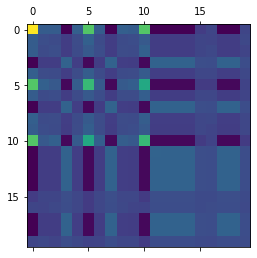

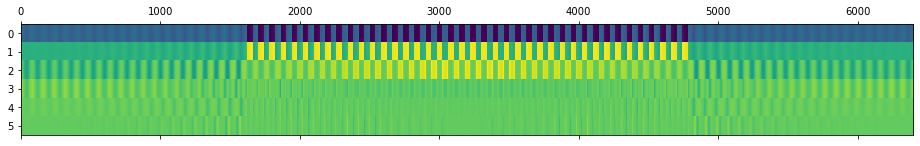

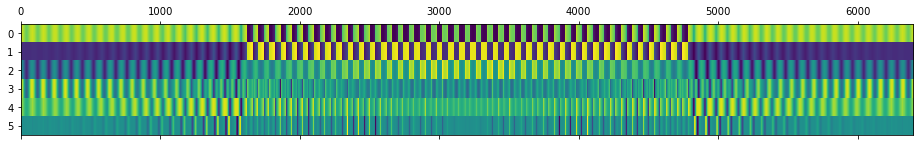

In [8]:
dfNorm = prepro_data(data, isCenter=True, dimPCA=dimPCA,isPlot=True,method='minmax')

In [10]:
from code.data.stream import get_encode_stream

In [11]:
base = 20
stream = get_encode_stream(dfNorm, base, dtype='uint64')

samples: 6400 ftrs: 6 base: 20


In [13]:
from code.sketch.HH import *

In [16]:
base =20
dtype = 'uint64'
isExact = True
topk = None

In [19]:
dfHH = get_exact_pd(stream,base,dimPCA, dtype, isExact, topk, r=16, d=1000000,c=None,device=None)

=============exact counting HHs==============
exact counting time:0.00


In [20]:
dfHH

,0,1,2,3,4,5,HH,freq,rk,ra
0,0.0,18.0,10.0,10.0,12.0,10.0,34004360.0,70.0,70.0,0.010937
1,0.0,18.0,9.0,10.0,12.0,9.0,30803960.0,68.0,138.0,0.021562
2,15.0,2.0,2.0,7.0,12.0,10.0,33976855.0,64.0,202.0,0.031563
3,15.0,2.0,17.0,7.0,12.0,9.0,30782855.0,64.0,266.0,0.041563
4,0.0,18.0,10.0,9.0,12.0,10.0,33996360.0,58.0,324.0,0.050625
...,...,...,...,...,...,...,...,...,...,...
1149,16.0,2.0,10.0,15.0,11.0,10.0,33884056.0,1.0,6396.0,0.999375
1150,16.0,2.0,10.0,16.0,13.0,10.0,34212056.0,1.0,6397.0,0.999531
1151,17.0,2.0,10.0,17.0,15.0,10.0,34540057.0,1.0,6398.0,0.999687
1152,16.0,1.0,10.0,19.0,9.0,10.0,33596036.0,1.0,6399.0,0.999844


In [ ]:
from 

In [40]:
umapT = get_umap_pd(dfHH, ftr=None,isPlot=True)

NameError: name 'sns' is not defined

In [37]:
kmap = get_kmean_lbl(dfHH, 10, u1 = 'u1', u2 = 'u2')

In [ ]:
def get_pred_stream(stream_1D, mask, pd,  k_cluster, val = 'val', bg = -1, color = 0, sgn = 1 ):
    mask=mask.astype('bool')
    HHvals = np.array(pd[val])
    HHcluster = np.array(pd[k_cluster])
    masked_streams = np.zeros(np.shape(stream_1D))
    for idx, val in enumerate( HHvals): 
        label = HHcluster[idx]
        masked_streams = np.where(stream_1D != val, masked_streams, color +sgn * label)
    final_umap = np.ones(mask.shape) * bg
    final_umap[mask] = masked_streams
    return final_umap 